In [ ]:
from random import uniform
from typing import Tuple, Callable
import numpy as np
from matplotlib import pyplot as plt


class SimpleGradientDescent:
    def __init__(self,
                 func: Callable[[float, float], float],
                 grad_func: Callable[[float, float], Tuple[float, float]],
                 alpha: float = 0.1):
        self.alpha = alpha
        self.func = func
        self.grad_func = grad_func
        self.trace = None  # trace of search

    def set_plot(self, x1: float, x2: float, y1: float, y2: float):
        grit = round((x2-x1)*0.01, 2)
        x = np.arange(x1, x2, grit)
        y = np.arange(y1, y2, grit)
        x, y = np.meshgrid(x, y)
        z = self.func(x, y)

        plt.figure()
        plt.contour(x, y, z, 50, zorder=-1)

    def plot_func(self):
        if len(self.trace) > 0:
            plt.scatter(self.trace[:, 0], self.trace[:, 1], s=10)

    def calculate_func_vale(self, x1: float, x2: float) -> float:
        return self.func(x1, x2)

    def calculate_func_grad(self, x1: float, x2: float) -> Tuple[float, float]:
        return self.grad_func(x1, x2)

    def gradient_descent_step(self, x1: float, x2: float) -> Tuple[float, float]:
        delta_x1, delta_x2 = self.calculate_func_grad(x1, x2)
        delta_x1 *= self.alpha
        delta_x2 *= self.alpha
        return x1 - delta_x1, x2 - delta_x2

    def minimize(self, x1_init: float, x2_init: float, steps: int, verbose: bool = False, plot: bool = False) -> float:
        self.trace = np.empty((steps + 1, 3))
        x1 = x1_init
        x2 = x2_init
        z = self.calculate_func_vale(x1, x2)
        self.trace[0] = [x1, x2, z]

        for i in range(steps):
            x1, x2 = self.gradient_descent_step(x1, x2)
            z = self.calculate_func_vale(x1, x2)
            self.trace[i+1] = [x1, x2, z]

            if verbose is True:
                delta_x1, delta_x2 = self.calculate_func_grad(x1, x2)
                print(f"Gradient: {delta_x1}, {delta_x2}, new coordinates: {x1}, {x2}, {z}; ")
        if plot:
            self.plot_func()
        return z

Klasa otrzymuje funkcję, jej funkcję gradientu oraz rozmiar kroku. Jeden krok w przeszukiwaniu to przesunięcie punktu o wektor (-gradient(punkt)*alpha) oraz zapisanie nowo otrzymanego punktu w śladzie (historii) przeszukiwań. Po wykonaniu podanej ilości kroków funkcja może narysować na wcześniej przygotowanym wykresie drogę, po jakiej poruszał się punkt.

In [ ]:
def function1(x1, x2):
    return x1 ** 2 + x2 ** 2

def gradient1(x1, x2):
    return 2 * x1, 2 * x2

def function2(x1, x2):
    return 1.5 - np.e**(- x1**2 - x2**2) - 0.5*np.e**(- (x1-1)**2 - (x2+2)**2 )

def gradient2(x1, x2):
    return (2*x1*np.e**(- x1**2 - x2**2) + (x1-1)*np.e**(- (x1-1)**2 - (x2+2)**2 ),
            2*x2*np.e**(- x1**2 - x2**2) + (x2+2)*np.e**(- (x1-1)**2 - (x2+2)**2 ))

Mając funkcje i gradienty, można sprawdzić działanie algorytmu dla różnych rozmiarów kroku:

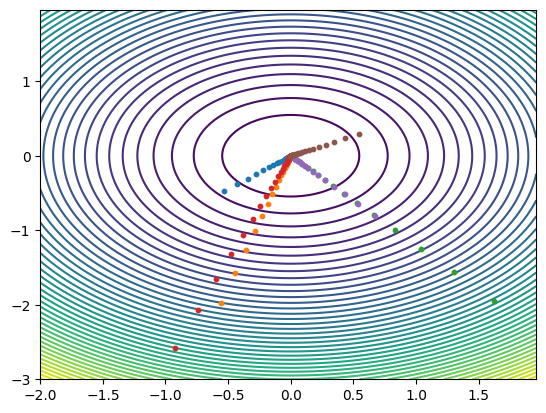

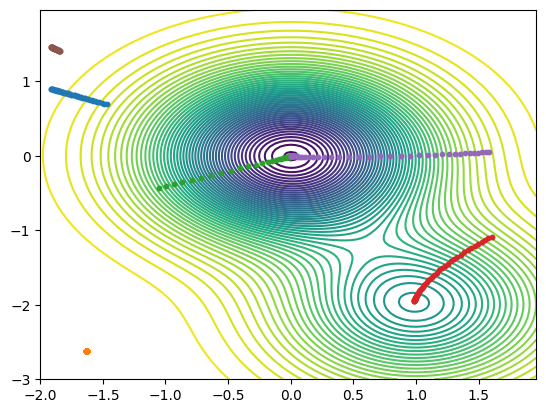

In [ ]:
sgd1 = SimpleGradientDescent(func=function1, grad_func=gradient1, alpha=0.1)
sgd2 = SimpleGradientDescent(func=function2, grad_func=gradient2, alpha=0.1)

sgd1.set_plot(-2, 2, -3, 2)
for _ in range(6):
    sgd1.minimize(uniform(-2, 2), uniform(-3, 2), 50, plot=True)
sgd2.set_plot(-2, 2, -3, 2)
for _ in range(6):
    sgd2.minimize(uniform(-2, 2), uniform(-3, 2), 50, plot=True)

plt.show()

W większości przypadków przybliżone minimum zostało odnalezione.

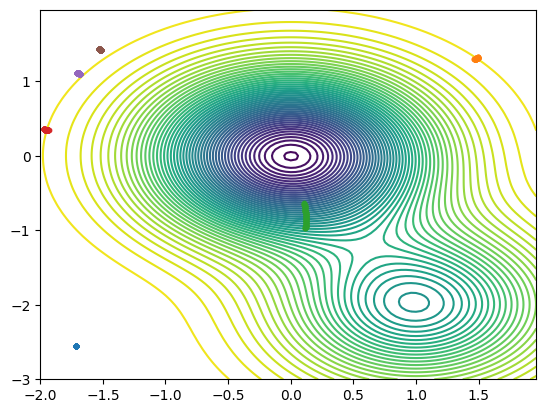

In [ ]:
sgd1 = SimpleGradientDescent(func=function1, grad_func=gradient1, alpha=0.01)
sgd2 = SimpleGradientDescent(func=function2, grad_func=gradient2, alpha=0.01)

sgd1.set_plot(-2, 2, -3, 2)
for _ in range(6):
    sgd1.minimize(uniform(-2, 2), uniform(-3, 2), 50, plot=True)
sgd2.set_plot(-2, 2, -3, 2)
for _ in range(6):
    sgd2.minimize(uniform(-2, 2), uniform(-3, 2), 50, plot=True)

plt.show()

Wykonywane kroki były zbyt małe, przez co nie udało się osiągnąć zadowalających postępów w wyznaczonej ilości etapów.

In [ ]:
sgd1 = SimpleGradientDescent(func=function1, grad_func=gradient1, alpha=2)
sgd2 = SimpleGradientDescent(func=function2, grad_func=gradient2, alpha=2)

sgd1.set_plot(-2, 2, -3, 2)
for _ in range(6):
    sgd1.minimize(uniform(-2, 2), uniform(-3, 2), 50, plot=True)
sgd2.set_plot(-2, 2, -3, 2)
for _ in range(6):
    sgd2.minimize(uniform(-2, 2), uniform(-3, 2), 50, plot=True)

plt.show()

Współczynnik był za duży, przez co punkty przeskakiwały przez minimum funkcji lub zaczęły się od niego oddalać (pierwszy wykres, gradienty oddalone od minimum były coraz większe, przez co punkty są drastycznie oddalone od celu).